In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
import datetime

- https://www.marijuanamoment.net/crime-rates-drop-after-marijuana-dispensaries-open-nearby-study-finds/
- https://medium.com/r?url=https%3A%2F%2Fgazette.com%2Fopinion%2Flimitations-of-states-legalized-marijuana%2Farticle_4b57658b-e446-5e00-8a26-d95b92d0b781.html
- https://medium.com/r?url=https%3A%2F%2Fwww.jjay.cuny.edu%2Fnews%2Fsales-recreational-marijuana-denver-found-increase-some-nonviolent-crime

In [2]:
# code is from lecture assingment

from zipfile import ZipFile
from io import BytesIO

# initializing empty list
sales = []

# opening zip file as input_zipfile
with ZipFile('co_cannabis_sales_recreational.zip') as input_zipfile:
    
    # iterating through csv files in the namelist
    for name in input_zipfile.namelist():
        
        # Only open CSV files
        if name.endswith('.csv'):
            
            # splitting on csv file to grab the name
            noncsv_name = name.split('.csv')[0]
            
            # reading in file with .read method
            read_file = input_zipfile.read(name)
            
            # appending files to the sales_dfs list
            sales.append(pd.read_csv(BytesIO(read_file)))

# using concat to combine df's from the sales list into one, storing in sales_dfs
sales_dfs = pd.concat(sales, ignore_index=True)

sales_dfs.head()

sales_dfs['County'] = sales_dfs['County'] + ' County'

sales_dfs.dropna(inplace=True)

grouped_sales = sales_dfs.groupby(['Year','County', 'Month']).sum().reset_index()

In [3]:
crimes_df = pd.read_csv("co_county_crimes.csv")
crimes_df.dropna(inplace=True)

In [4]:
ld= {
            'January': 1,
            'February': 2,
            'March': 3,
            'April': 4,
            'May': 5,
            'June': 6,
            'July': 7,
            'August': 8,
            'September': 9, 
            'October': 10,
            'November': 11,
            'December': 12
    }

crimes_df['Month'] = crimes_df['Month'].apply(lambda x: ld[x])

In [5]:
grouped_crimes = crimes_df.groupby(['County', 'Year', 'Month']).agg({'Crimes Against Person':sum, 'Crimes Against Property':sum,
                                                           'Drug Equipment Violations':sum,
                                                           'Drug/Narcotic Violations':sum}).reset_index()

grouped_crimes.head()

,County,Year,Month,Crimes Against Person,Crimes Against Property,Drug Equipment Violations,Drug/Narcotic Violations
0,Adams County,2008,1,640,"3,082",202.0,333.0
1,Adams County,2008,2,615,"2,677",253.0,349.0
2,Adams County,2008,3,723,"3,102",244.0,406.0
3,Adams County,2008,4,745,"3,135",226.0,354.0
4,Adams County,2008,5,691,"3,247",233.0,356.0


In [6]:
sales_and_crimes = grouped_sales.merge(grouped_crimes, on=['County', 'Year', 'Month'], how='inner')
sales_and_crimes.head()

,Year,County,Month,Sales,Crimes Against Person,Crimes Against Property,Drug Equipment Violations,Drug/Narcotic Violations
0,2014,Adams County,11,1304091.0,807,"3,182",162.0,222.0
1,2014,Adams County,12,1445817.0,698,"2,983",162.0,201.0
2,2014,Arapahoe County,11,805369.0,149,868,59.0,63.0
3,2014,Arapahoe County,12,1416559.0,171,940,68.0,79.0
4,2014,Boulder County,3,1396479.0,180,687,44.0,60.0


In [7]:
co_county = sales_and_crimes[sales_and_crimes['County']=='Denver County']
# np.corrcoef(sales_and_crimes['Sales'], sales_and_crimes['Crimes Against Person'])
co_county.head()

,Year,County,Month,Sales,Crimes Against Person,Crimes Against Property,Drug Equipment Violations,Drug/Narcotic Violations
19,2014,Denver County,1,8482593.0,810,"2,895",74.0,203.0
20,2014,Denver County,2,8349069.0,732,"2,190",79.0,218.0
21,2014,Denver County,3,10746117.0,751,"2,529",92.0,246.0
22,2014,Denver County,4,12005332.0,722,"2,417",84.0,256.0
23,2014,Denver County,5,11300905.0,941,"2,672",86.0,209.0


In [8]:
co_county.replace(',','', regex=True, inplace=True)


co_county.iloc[:, 3:] = co_county.iloc[:, 3:].astype(float)

/Users/michaelm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
/Users/michaelm/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [9]:
np.corrcoef(co_county['Sales'], co_county['Crimes Against Person'])

array([[1.       , 0.6013312],
       [0.6013312, 1.       ]])

In [10]:
np.corrcoef(co_county['Sales'], co_county['Drug Equipment Violations'])

array([[ 1.        , -0.63879615],
       [-0.63879615,  1.        ]])

<AxesSubplot:xlabel='Sales', ylabel='Drug Equipment Violations'>

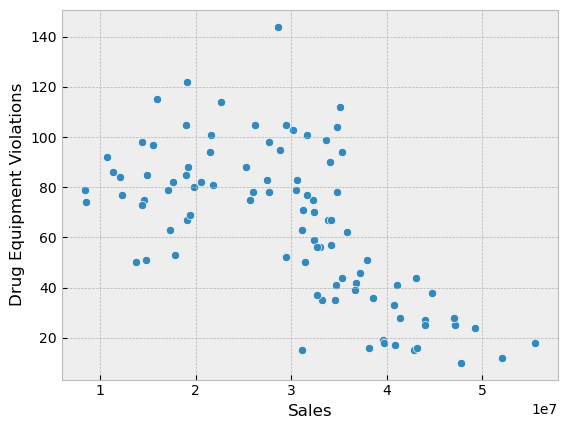

In [48]:
sb.scatterplot(data = co_county, x='Sales', y='Drug Equipment Violations')

<AxesSubplot:xlabel='Sales', ylabel='Crimes Against Person'>

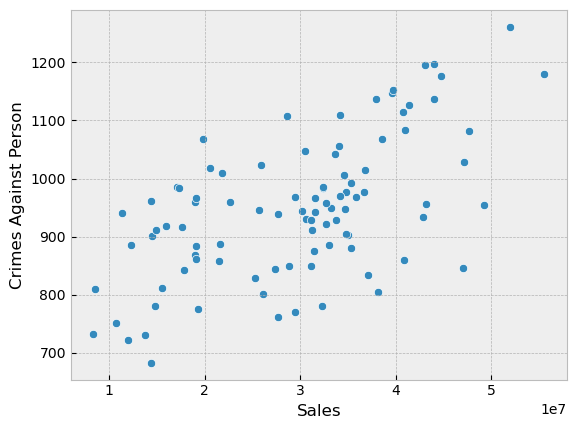

In [49]:
sb.scatterplot(data = co_county, x='Sales', y='Crimes Against Person')

In [13]:
co_county['Drug Equipment Violations'].to_list()

[74.0,
 79.0,
 92.0,
 84.0,
 86.0,
 77.0,
 75.0,
 115.0,
 98.0,
 85.0,
 50.0,
 51.0,
 97.0,
 73.0,
 79.0,
 85.0,
 82.0,
 63.0,
 80.0,
 82.0,
 67.0,
 122.0,
 53.0,
 69.0,
 105.0,
 88.0,
 94.0,
 114.0,
 101.0,
 81.0,
 78.0,
 98.0,
 105.0,
 144.0,
 105.0,
 83.0,
 75.0,
 88.0,
 83.0,
 103.0,
 79.0,
 101.0,
 90.0,
 112.0,
 104.0,
 99.0,
 71.0,
 75.0,
 95.0,
 78.0,
 78.0,
 67.0,
 77.0,
 70.0,
 57.0,
 94.0,
 67.0,
 59.0,
 50.0,
 56.0,
 63.0,
 52.0,
 44.0,
 62.0,
 42.0,
 36.0,
 41.0,
 44.0,
 51.0,
 39.0,
 41.0,
 35.0,
 56.0,
 37.0,
 46.0,
 15.0,
 27.0,
 10.0,
 18.0,
 12.0,
 25.0,
 17.0,
 15.0,
 16.0,
 16.0,
 28.0,
 24.0,
 38.0,
 33.0,
 25.0,
 28.0,
 19.0,
 18.0,
 35.0]

In [14]:
import pandas as pd
from sklearn import linear_model
import numpy as np

In [46]:
features = ['Sales']
target = 'Crimes Against Person'

X = co_county[features].values.reshape(-1, len(features))
y = co_county[target].values

print(X.shape)
print(y.shape)

from sklearn import linear_model

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

x_pred = np.array([1, 5000000])
x_pred = x_pred.reshape(-1, len(features))

x_pred = np.linspace(5000.0, 70000000.0, 1000000)            # 200 data points between 0 ~ 40
x_pred = x_pred.reshape(-1, len(features))  # preprocessing required by scikit-learn functions

y_pred = model.predict(x_pred)



(94, 1)
(94,)


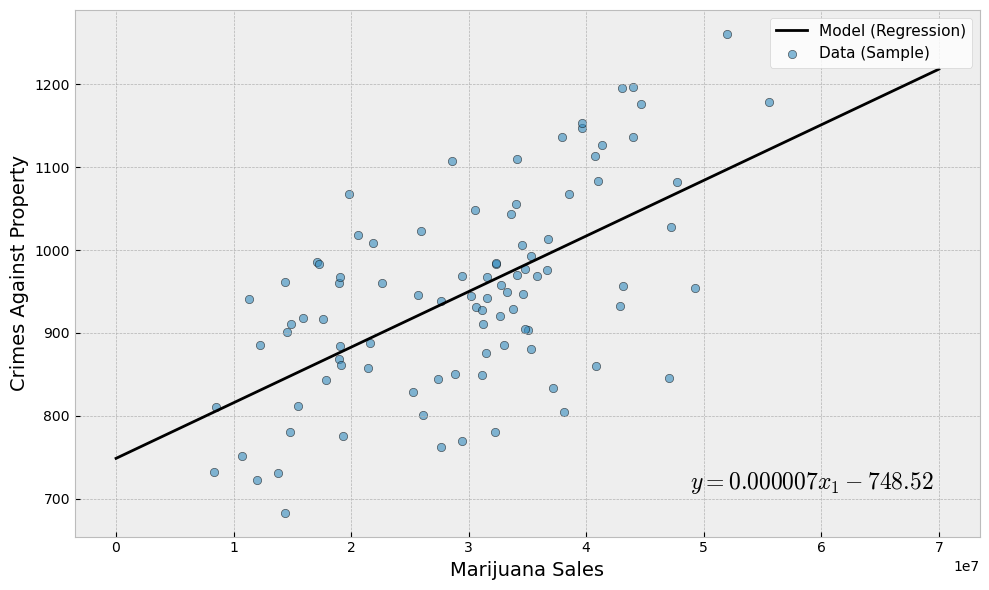

In [54]:
import matplotlib.pyplot as plt

# plt.style.use('default')
plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x_pred, y_pred, color='black', label='Model (Regression)')

plt.scatter(X, y, edgecolor='k', alpha=0.6, label='Data (Sample)')

ax.set_ylabel('Crimes Against Property', fontsize=14)
ax.set_xlabel('Marijuana Sales', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.text(0.68, 0.09, '$y = %.6f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)
fig.tight_layout()

(94, 1)
(94,)


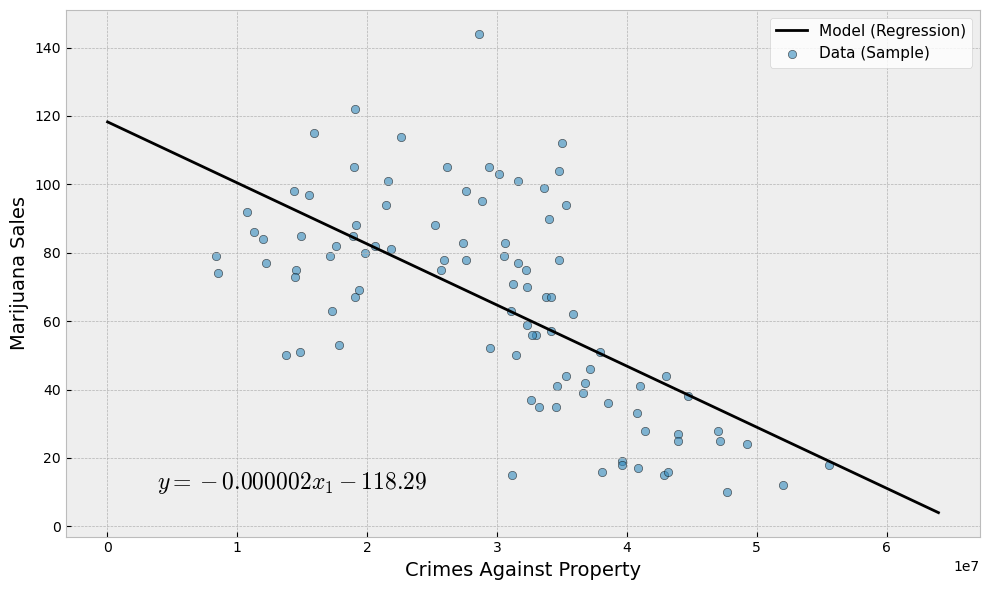

In [37]:
features = ['Sales']
target = 'Drug Equipment Violations'

X = co_county[features].values.reshape(-1, len(features))
y = co_county[target].values

print(X.shape)
print(y.shape)

from sklearn import linear_model

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

x_pred = np.array([1, 5000000])
x_pred = x_pred.reshape(-1, len(features))

x_pred = np.linspace(10000.0, 64000000.0, 1000000)          # 200 data points between 0 ~ 40
x_pred = x_pred.reshape(-1, len(features))  # preprocessing required by scikit-learn functions

y_pred = model.predict(x_pred)

# https://aegis4048.github.io/mutiple_linear_regression_and_visualization_in_python



import matplotlib.pyplot as plt

plt.style.use('default')
plt.style.use('bmh')

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x_pred, y_pred, color='k', label='Model (Regression)')

plt.scatter(X, y, edgecolor='k', alpha=0.6, label='Data (Sample)')

ax.set_ylabel('Marijuana Sales', fontsize=14)
ax.set_xlabel('Crimes Against Property', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.text(0.10, 0.09, '$y = %.6f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)
fig.tight_layout()